# Pymaceuticals Inc.
---

### Analysis
This data reviews how mice with tumors tested over time when exposed to 10 different drug regimens. 

One conclusion we can draw is that Capomulin and Ramicane had the best response from the mice based on their mean, median, standard deviation, and variance. The other 8 drugs all scored relatively similar to each other, but these two drugs scored the best in those areas. 
Another conclusion we can draw is that the data was very consistent. Not many outliers exist within the data across the drug regimens that were used. Most importantly, no outliers were found with the two most effective drugs Capomulin and Ramicane. 
Lastly. we found that there was a correlation between mouse weight and tumor volume when mice were treated with Capomulin. As the mice increased in weight, their average tumor volume increased at a nearly identical rate. Our linear regression line shows this correlation clearly. 


In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, left_on= 'Mouse ID', right_on= 'Mouse ID', how= 'outer')

# Display the data table for preview
display(merged_df)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [133]:
# Checking the number of mice
non_null_count= merged_df['Mouse ID'].nunique()
print(non_null_count)  

249


In [134]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_data = merged_df[['Mouse ID', 'Timepoint']].duplicated()
print(duplicate_data)

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool


In [135]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = merged_df[duplicate_data]
print(duplicate_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
587     g989     Propriva  Female          21          26          0   
589     g989     Propriva  Female          21          26          5   
591     g989     Propriva  Female          21          26         10   
593     g989     Propriva  Female          21          26         15   
595     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
587           45.000000                 0  
589           47.570392                 0  
591           49.880528                 0  
593           53.442020                 0  
595           54.657650                 1  


In [136]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dupe_data = merged_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
print(no_dupe_data)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        a203    Infubinol  Female          20          23          0   
1        a203    Infubinol  Female          20          23          5   
2        a203    Infubinol  Female          20          23         10   
3        a203    Infubinol  Female          20          23         15   
4        a203    Infubinol  Female          20          23         20   
...       ...          ...     ...         ...         ...        ...   
1888     z969     Naftisol    Male           9          30         25   
1889     z969     Naftisol    Male           9          30         30   
1890     z969     Naftisol    Male           9          30         35   
1891     z969     Naftisol    Male           9          30         40   
1892     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              48.508468         

In [137]:
# Checking the number of mice in the clean DataFrame.
clean_mice= no_dupe_data['Mouse ID'].nunique()
print(clean_mice)  

249


## Summary Statistics

In [138]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = no_dupe_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = no_dupe_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = no_dupe_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = no_dupe_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = no_dupe_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Deviation': std_dev,
    'SEM': sem
})

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [139]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
df = pd.DataFrame(no_dupe_data)

agg_summary_stats = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
)
print(agg_summary_stats)

                   Mean     Median   Variance  Standard_Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

<Axes: title={'center': 'Drug Regimen over Time'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

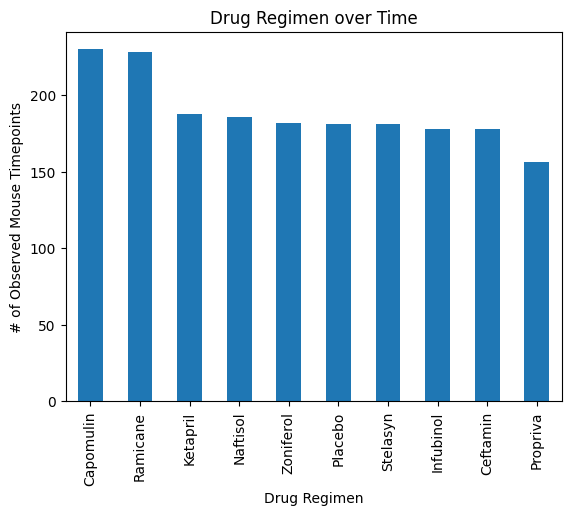

In [140]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = no_dupe_data['Drug Regimen'].value_counts()

regimen_counts.plot.bar(title='Drug Regimen over Time', ylabel='# of Observed Mouse Timepoints', xlabel='Drug Regimen')


Text(0.5, 1.0, 'Drug Regimen over Time')

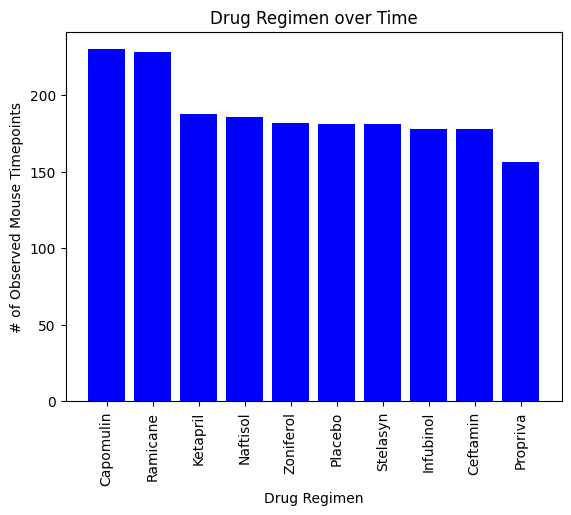

In [141]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = no_dupe_data['Drug Regimen'].value_counts()

plt.bar(regimen_counts.index, regimen_counts.values, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Drug Regimen over Time')

<Axes: title={'center': 'Distribution by Sex'}, ylabel='count'>

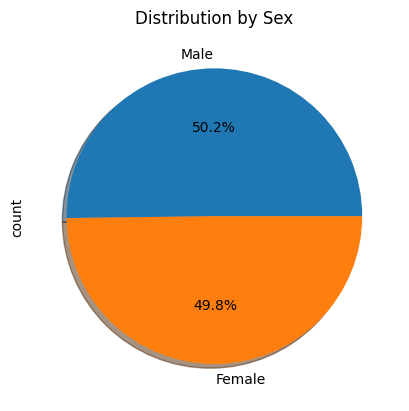

In [142]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
mouse_sex_count = no_dupe_data.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts()
#mouse_sex_count

# Make the pie chart
mouse_sex_count.plot.pie(autopct = "%1.1f%%", shadow=True, title = 'Distribution by Sex')


Text(0.5, 1.0, 'Distribution of Mouse Sex')

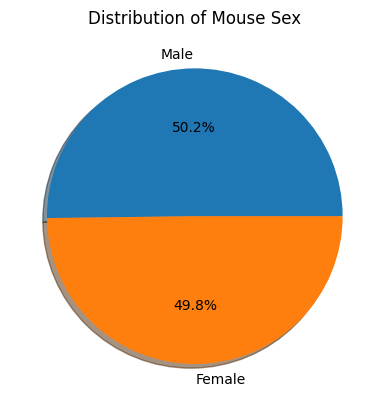

In [143]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
mouse_sex_count = no_dupe_data.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts()

# Make the pie chart
plt.pie(mouse_sex_count, labels=mouse_sex_count.index, autopct = "%1.1f%%", shadow = True)
plt.title('Distribution of Mouse Sex')




## Quartiles, Outliers and Boxplots

In [144]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = no_dupe_data[no_dupe_data['Drug Regimen'].isin(regimens)]
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [145]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {}
outliers = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
Q1 = final_tumor_volume['Tumor Volume (mm3)'].quantile(0.25)
Q3 = final_tumor_volume['Tumor Volume (mm3)'].quantile(0.75)
Q1 = round(Q1, 2)
Q3 = round(Q3, 2)
IQR = Q3 - Q1
IQR = round(Q3 - Q1, 2)

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

    # Locate the rows which contain mice on each drug and get the tumor volumes
   
for regimen in regimens:
    regimen_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]
    tumor_vol_data[regimen] = regimen_data['Tumor Volume (mm3)'].tolist()  
    

for regimen, volumes in tumor_vol_data.items():
    print(f"Tumor volumes for {regimen}: {volumes}")

#display(final_tumor_volume)
    # add subset
#print(tumor_vol_data.items())

    # Determine outliers using upper and lower bounds
#outliers = final_tumor_volume[(Q1['Tumor Volume (mm3)'] < lower_bound) | (Q3['Tumor Volume (mm3)'] > upper_bound)]
#print(outliers)

for regimen, volumes in tumor_vol_data.items():
    regimen_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]
    outliers_data = regimen_data[(regimen_data['Tumor Volume (mm3)'] < lower_bound) | (regimen_data['Tumor Volume (mm3)'] > upper_bound)]
    outliers[regimen] = outliers_data['Tumor Volume (mm3)'].tolist()
    print(f"{regimen}'s potential outliers: {outliers[regimen]}")



Q1: 37.19
Q3: 59.93
IQR: 22.74
Lower Bound: 3.0799999999999983
Upper Bound: 94.03999999999999
Tumor volumes for Capomulin: [38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.1251644, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384]
Tumor volumes for Ramicane: [38.4076183, 43.0475426, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575]
Tumor volumes for Infubinol: [67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.3213458, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16

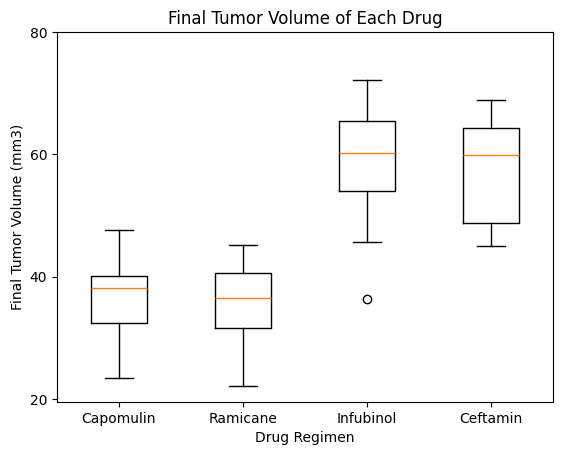

In [146]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

custom_ticks_x = [1, 2, 3, 4]
custom_labels_x = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
custom_ticks_y = [20, 40, 60, 80]
custom_labels_y = [20, 40, 60, 80]

plt.boxplot(tumor_vol_data.values())
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title(f'Final Tumor Volume of Each Drug')
plt.xticks(custom_ticks_x, custom_labels_x)
plt.yticks(custom_ticks_y, custom_labels_y)
plt.show()

## Line and Scatter Plots

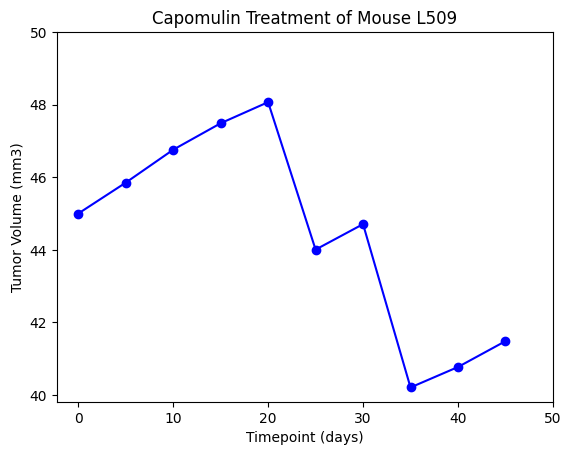

In [147]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = ['l509']
regimen = ['Capomulin']
filtered_data = no_dupe_data[(no_dupe_data['Mouse ID'] == mouse_id[0]) & (no_dupe_data['Drug Regimen'] == regimen[0])]

custom_ticks_x = [0, 10, 20, 30, 40, 50]
custom_labels_x = [0, 10, 20, 30, 40, 50]
custom_ticks_y = [40, 42, 44, 46, 48, 50]
custom_labels_y = [40, 42, 44, 46, 48, 50]

plt.plot(filtered_data['Timepoint'], filtered_data['Tumor Volume (mm3)'], marker='o', color='blue')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of Mouse L509')
plt.xticks(custom_ticks_x, custom_labels_x)
plt.yticks(custom_ticks_y, custom_labels_y)
plt.show()

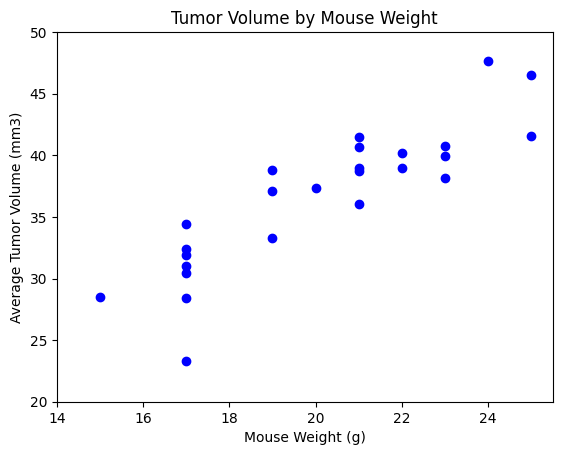

In [148]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
custom_ticks_x = [14, 16, 18, 20, 22, 24]
custom_labels_x = [14, 16, 18, 20, 22, 24]
custom_ticks_y = [20, 25, 30, 35, 40, 45, 50]
custom_labels_y = [20, 25, 30, 35, 40, 45, 50]
filtered_data = final_tumor_volume[(final_tumor_volume['Drug Regimen'] == 'Capomulin')]

plt.scatter(filtered_data['Weight (g)'], filtered_data['Tumor Volume (mm3)'], marker='o', color='blue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title(f'Tumor Volume by Mouse Weight')
plt.xticks(custom_ticks_x, custom_labels_x)
plt.yticks(custom_ticks_y, custom_labels_y)
plt.show()

## Correlation and Regression

The Correlation Coefficient between weight and tumor volume for Capomulin is  -0.4657324839892911


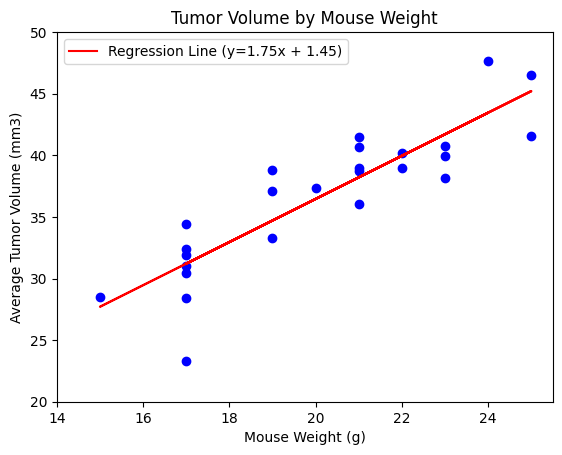

In [149]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
custom_ticks_x = [14, 16, 18, 20, 22, 24]
custom_labels_x = [14, 16, 18, 20, 22, 24]
custom_ticks_y = [20, 25, 30, 35, 40, 45, 50]
custom_labels_y = [20, 25, 30, 35, 40, 45, 50]
filtered_data = final_tumor_volume[(final_tumor_volume['Drug Regimen'] == 'Capomulin')]

correlation_coefficient = final_tumor_volume['Weight (g)'].corr(final_tumor_volume['Drug Regimen'] == 'Capomulin')
print("The Correlation Coefficient between weight and tumor volume for Capomulin is ", correlation_coefficient)

slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_data['Weight (g)'], filtered_data['Tumor Volume (mm3)'])
x = filtered_data['Weight (g)']
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Regression Line (y={slope:.2f}x + {intercept:.2f})')


plt.scatter(filtered_data['Weight (g)'], filtered_data['Tumor Volume (mm3)'], marker='o', color='blue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title(f'Tumor Volume by Mouse Weight')
plt.xticks(custom_ticks_x, custom_labels_x)
plt.yticks(custom_ticks_y, custom_labels_y)
plt.legend()
plt.show()